In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기
digits = load_digits()
X = digits.data            # 64개 픽셀값 (8x8 이미지를 1D 벡터로)
y = digits.target

# 2. 이진 분류: 숫자 0 vs 숫자 1~9
y_binary = (y == 0).astype(int)  # 0이면 1, 나머지는 0

# 3. 데이터 나누기 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 4. 정규화 (선택)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM 정확도:", accuracy_score(y_test, svm_pred))

# 의사결정나무
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree 정확도:", accuracy_score(y_test, dt_pred))

# 랜덤포레스트
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest 정확도:", accuracy_score(y_test, rf_pred))

SVM 정확도: 0.9972222222222222
Decision Tree 정확도: 0.9916666666666667
Random Forest 정확도: 0.9944444444444445


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MLP 모델 구성
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
mlp_loss, mlp_acc = mlp_model.evaluate(X_test, y_test)
print("MLP 정확도:", mlp_acc)

Epoch 1/10


/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.3021 - val_accuracy: 0.9757 - val_loss: 0.1071
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.0624 - val_accuracy: 0.9965 - val_loss: 0.0393
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0185 - val_accuracy: 0.9965 - val_loss: 0.0240
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0123 - val_accuracy: 0.9965 - val_loss: 0.0192
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0059 - val_accuracy: 0.9965 - val_loss: 0.0154
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9965 - val_loss: 0.0137
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9965 - val_loss: 0.0132
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9965 - val_loss: 0.0121
Epo

In [5]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# CNN은 2D 이미지 형태 필요
X_train_cnn = X_train.reshape(-1, 8, 8, 1)
X_test_cnn = X_test.reshape(-1, 8, 8, 1)

cnn_model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN 정확도:", cnn_acc)

Epoch 1/10


/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7345 - loss: 0.5246 - val_accuracy: 0.8785 - val_loss: 0.3016
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.1886 - val_accuracy: 0.9444 - val_loss: 0.1443
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9665 - loss: 0.1069 - val_accuracy: 0.9896 - val_loss: 0.0689
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9966 - loss: 0.0443 - val_accuracy: 0.9965 - val_loss: 0.0401
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0218 - val_accuracy: 0.9965 - val_loss: 0.0289
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0162 - val_accuracy: 0.9965 - val_loss: 0.0244
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0107 - val_accuracy: 0.9965 - val_loss: 0.0202
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0070 - val_accuracy: 0.9965 - val_loss: 0.0189
Epo

In [6]:
from tensorflow.keras.layers import LSTM, Reshape

# 8x8 이미지를 (8,8)로 나눠서 시계열처럼 처리
X_train_seq = X_train.reshape(-1, 8, 8)
X_test_seq = X_test.reshape(-1, 8, 8)

lstm_model = Sequential([
    LSTM(32, input_shape=(8, 8)),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_split=0.2)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_seq, y_test)
print("LSTM 스타일 정확도:", lstm_acc)

Epoch 1/10


/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5907 - loss: 0.6563 - val_accuracy: 0.9514 - val_loss: 0.4531
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.3716 - val_accuracy: 0.9306 - val_loss: 0.1710
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1438 - val_accuracy: 0.9583 - val_loss: 0.1214
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.0855 - val_accuracy: 0.9757 - val_loss: 0.0897
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.0640 - val_accuracy: 0.9826 - val_loss: 0.0658
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0410 - val_accuracy: 0.9931 - val_loss: 0.0491
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0237 - val_accuracy: 0.9931 - val_loss: 0.0366
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0183 - val_accuracy: 0.9931 - val_loss: 0.0290
Epo

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)

In [9]:
print(scores)

0.9666666666666667


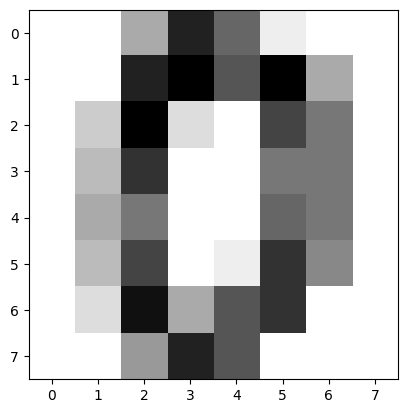

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)



In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


[8]


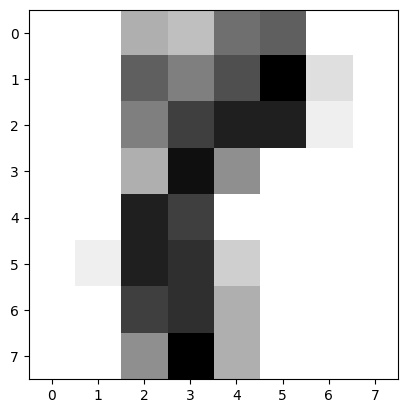

In [17]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

In [2]:
!pip install -U scikit-learn

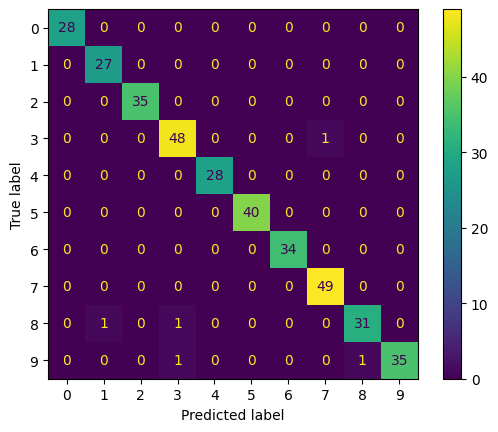

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

X_train,X_test,y_train,y_test = train_test_split(data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [ ]:
print(f"{metrics.classification_report(y_test, y_pred)}\n")